In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [5]:
aml_df = pd.read_csv('../data_files/aml.3snps.norm.csv', index_col=0)
#allergy_df = pd.read_csv('../data_files/allergy.allergy.normal.csv', index_col=0)
#diabetes_df = pd.read_csv('../data_files/diabetes.diabetes.normal.csv', index_col=0)
#diabetes_control_df = pd.read_csv('../data_files/diabetes_control.diabetes_control.normal.csv', index_col=0)
control_df = pd.read_csv('../data_files/geuvadis.geuvadis.normal.csv', index_col=0)

In [6]:
master_df = aml_df.append([control_df])

In [7]:
master_df.shape

(3895, 20)

In [8]:
master_df.columns

Index(['file_location', 'source', 'alignment_count', 'alpha_wt_count',
       'alpha_dup_count', 'beta_count', 'alpha_wt_zero_edit_count',
       'alpha_dup_zero_edit_count', 'beta_zero_edit_count',
       'alpha_read_covers_snps_count', 'alpha_dup_read_covers_snps_count',
       'beta_read_covers_snps_count', 'alpha_read_covers_snps_count_exact',
       'alpha_dup_read_covers_snps_count_exact',
       'beta_read_covers_snps_count_exact', 'srr_acc', 'total_spots',
       'norm_alpha_read_covers_snps_count_exact',
       'norm_alpha_dup_read_covers_snps_count_exact',
       'norm_beta_read_covers_snps_count_exact'],
      dtype='object')

In [9]:
master_df.describe()

,alignment_count,alpha_wt_count,alpha_dup_count,beta_count,alpha_wt_zero_edit_count,alpha_dup_zero_edit_count,beta_zero_edit_count,alpha_read_covers_snps_count,alpha_dup_read_covers_snps_count,beta_read_covers_snps_count,alpha_read_covers_snps_count_exact,alpha_dup_read_covers_snps_count_exact,beta_read_covers_snps_count_exact,total_spots,norm_alpha_read_covers_snps_count_exact,norm_alpha_dup_read_covers_snps_count_exact,norm_beta_read_covers_snps_count_exact
count,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3.895000e+03,3895.000000,3895.000000,3895.000000
mean,1582.529653,607.863158,621.680616,352.985879,448.779718,467.104750,229.756098,19.303466,15.308087,26.124005,9.207189,12.520154,21.436970,2.843394e+07,0.335061,0.527849,0.804852
std,7206.505444,3182.743680,3669.337945,1247.140931,2696.467126,3061.897723,814.536118,85.472311,150.441185,106.125834,49.343585,126.525744,89.919379,2.002915e+07,1.753594,5.113177,3.466708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.630000e+02,0.000000,0.000000,0.000000
25%,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.426846e+07,0.000000,0.000000,0.000000
50%,46.000000,10.000000,10.000000,10.000000,6.000000,6.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.306982e+07,0.000000,0.000000,0.000000
75%,682.000000,157.000000,143.500000,129.500000,81.000000,76.000000,88.000000,4.500000,0.000000,6.000000,1.000000,0.000000,5.000000,4.138190e+07,0.007112,0.000000,0.166655
max,173788.000000,82692.000000,90119.000000,20264.000000,72328.000000,78456.000000,12437.000000,1916.000000,4060.000000,2020.000000,1007.000000,3477.000000,1575.000000,1.858083e+08,33.294673,74.326065,80.157866


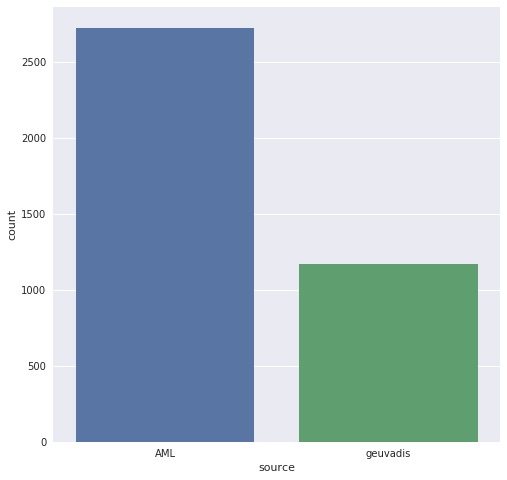

In [10]:
#How many of each type do we have?
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x='source', data=master_df)

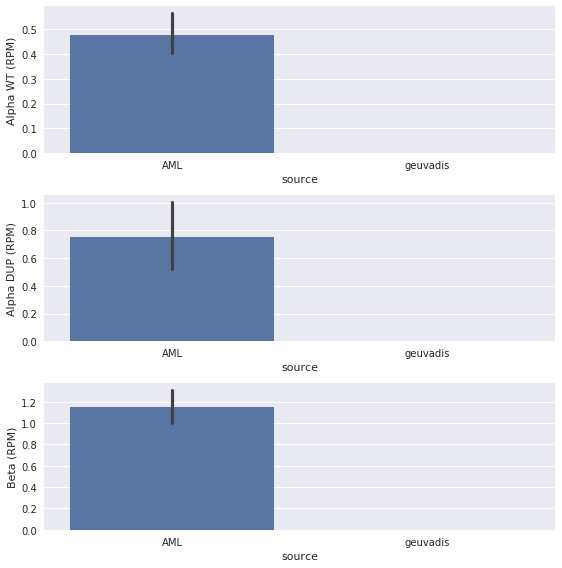

In [11]:
#What are the expression levels of each type?
fig, ax = plt.subplots(3,1,figsize=(8,8))
sns.barplot(x='source', y='norm_alpha_read_covers_snps_count_exact', data=master_df, ax=ax[0])
sns.barplot(x='source', y='norm_alpha_dup_read_covers_snps_count_exact', data=master_df, ax=ax[1])
sns.barplot(x='source', y='norm_beta_read_covers_snps_count_exact', data=master_df, ax=ax[2])

ax[0].set_ylabel('Alpha WT (RPM)')
ax[1].set_ylabel('Alpha DUP (RPM)')
ax[2].set_ylabel('Beta (RPM)')
plt.tight_layout()

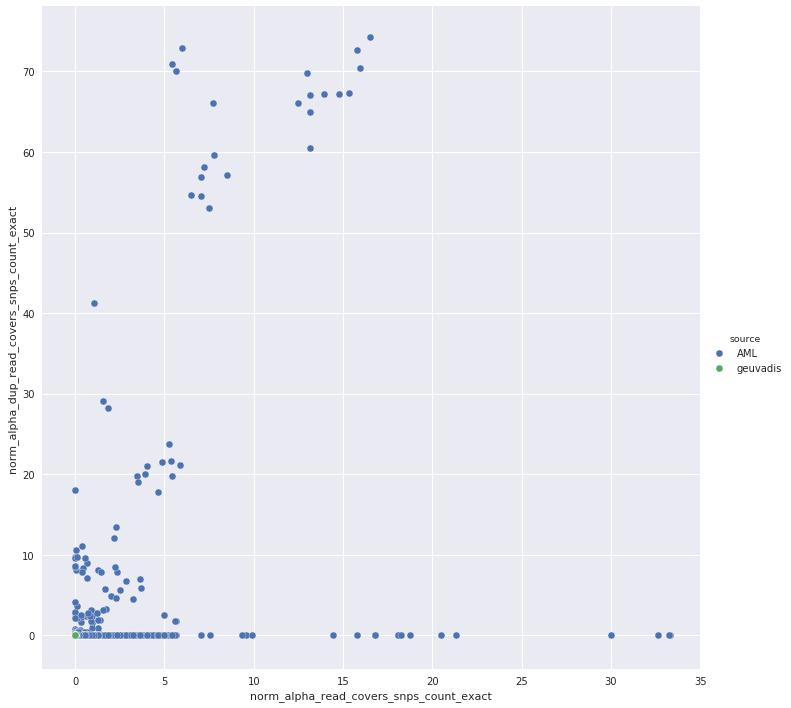

In [12]:
plot = sns.pairplot(x_vars=["norm_alpha_read_covers_snps_count_exact"], y_vars=["norm_alpha_dup_read_covers_snps_count_exact"], data=master_df, hue="source", size=10)

axes = plot.axes

#axes[0,0].set_ylim(-2,80)
#axes[0,0].set_xlim(-2,40)

In [13]:
#Ones with highest alpha dup expression

master_df[master_df['norm_alpha_dup_read_covers_snps_count_exact'] > 40].sort_values('norm_alpha_dup_read_covers_snps_count_exact', ascending=False)

,file_location,source,alignment_count,alpha_wt_count,alpha_dup_count,beta_count,alpha_wt_zero_edit_count,alpha_dup_zero_edit_count,beta_zero_edit_count,alpha_read_covers_snps_count,alpha_dup_read_covers_snps_count,beta_read_covers_snps_count,alpha_read_covers_snps_count_exact,alpha_dup_read_covers_snps_count_exact,beta_read_covers_snps_count_exact,srr_acc,total_spots,norm_alpha_read_covers_snps_count_exact,norm_alpha_dup_read_covers_snps_count_exact,norm_beta_read_covers_snps_count_exact
aml_aabspliced_SRR1608876.sam.sorted.bam,../aml_results/aml_aabspliced_SRR1608876.sam.s...,AML,53087,23538,24983,4566,19557,20996,3277,496,1304,270,240,1081,214,SRR1608876,14544023,16.501624,74.326065,14.713948
aml_aabspliced_SRR1036002.sam.sorted.bam,../aml_results/aml_aabspliced_SRR1036002.sam.s...,AML,50147,23450,25400,1297,21096,22779,954,114,1295,51,92,1126,45,SRR1036002,15431821,5.961707,72.966113,2.916052
aml_aabspliced_SRR1608873.sam.sorted.bam,../aml_results/aml_aabspliced_SRR1608873.sam.s...,AML,55035,24358,25959,4718,19950,21430,3390,507,1382,311,237,1090,251,SRR1608873,14999589,15.800433,72.668658,16.733792
aml_aabspliced_SRR1036004.sam.sorted.bam,../aml_results/aml_aabspliced_SRR1036004.sam.s...,AML,57952,27078,29277,1597,24260,26124,1107,120,1474,82,97,1269,67,SRR1036004,17909077,5.416248,70.857923,3.741120
aml_aabspliced_SRR1608877.sam.sorted.bam,../aml_results/aml_aabspliced_SRR1608877.sam.s...,AML,53312,23547,25075,4690,19225,20644,3380,501,1334,307,236,1042,243,SRR1608877,14795796,15.950477,70.425410,16.423584
aml_aabspliced_SRR1036003.sam.sorted.bam,../aml_results/aml_aabspliced_SRR1036003.sam.s...,AML,56082,26252,28345,1485,23426,25135,1006,116,1450,72,97,1205,64,SRR1036003,17201853,5.638927,70.050593,3.720529
aml_aabspliced_SRR1608871.sam.sorted.bam,../aml_results/aml_aabspliced_SRR1608871.sam.s...,AML,53220,23576,25111,4533,19123,20531,3232,470,1334,280,190,1024,214,SRR1608871,14658256,12.961979,69.858242,14.599281
aml_aabspliced_SRR1608874.sam.sorted.bam,../aml_results/aml_aabspliced_SRR1608874.sam.s...,AML,53079,23526,24959,4594,18784,20129,3206,499,1270,308,224,984,227,SRR1608874,14623541,15.317767,67.288764,15.522916
aml_aabspliced_SRR1608872.sam.sorted.bam,../aml_results/aml_aabspliced_SRR1608872.sam.s...,AML,54590,24364,25741,4485,19962,21253,3207,510,1281,297,220,1000,224,SRR1608872,14869853,14.795035,67.250160,15.064036
aml_aabspliced_SRR1916268.sam.sorted.bam,../aml_results/aml_aabspliced_SRR1916268.sam.s...,AML,128617,62044,66448,125,55942,59756,84,654,3078,1,566,2727,0,SRR1916268,40610331,13.937340,67.150401,0.000000


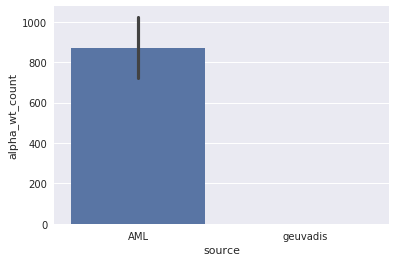

In [14]:
sns.barplot(x='source', y='alpha_wt_count', data=master_df)

In [16]:
control_df.describe()

,alignment_count,alpha_wt_count,alpha_dup_count,beta_count,alpha_wt_zero_edit_count,alpha_dup_zero_edit_count,beta_zero_edit_count,alpha_read_covers_snps_count,alpha_dup_read_covers_snps_count,beta_read_covers_snps_count,alpha_read_covers_snps_count_exact,alpha_dup_read_covers_snps_count_exact,beta_read_covers_snps_count_exact,total_spots,norm_alpha_read_covers_snps_count_exact,norm_alpha_dup_read_covers_snps_count_exact,norm_beta_read_covers_snps_count_exact
count,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.0,1170.000000,1170.000000,1170.0,1170.000000,1.170000e+03,1170.000000,1170.0,1170.000000
mean,3.957265,1.306838,1.294872,1.355556,1.180342,1.168376,1.161538,0.002564,0.0,0.001709,0.002564,0.0,0.001709,2.051294e+07,0.000055,0.0,0.000076
std,7.694657,2.746932,2.735139,2.523811,2.488459,2.476896,2.299713,0.050594,0.0,0.041327,0.050594,0.0,0.041327,1.314809e+07,0.001162,0.0,0.002059
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.283316e+06,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.063242e+07,0.000000,0.0,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.858682e+07,0.000000,0.0,0.000000
75%,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.878677e+07,0.000000,0.0,0.000000
max,120.000000,41.000000,41.000000,38.000000,38.000000,38.000000,37.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.858083e+08,0.032553,0.0,0.066677
